In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("Billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [5]:
data=data.dropna()
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [6]:
data["NetWorth"]=data["NetWorth"].str.strip("B")
data["NetWorth"]=data["NetWorth"].str.strip("$")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology


In [7]:
data["NetWorth"]=data["NetWorth"].astype(float)
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [77]:
df=data.sort_values(by=["NetWorth"],ascending=False).head(10)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


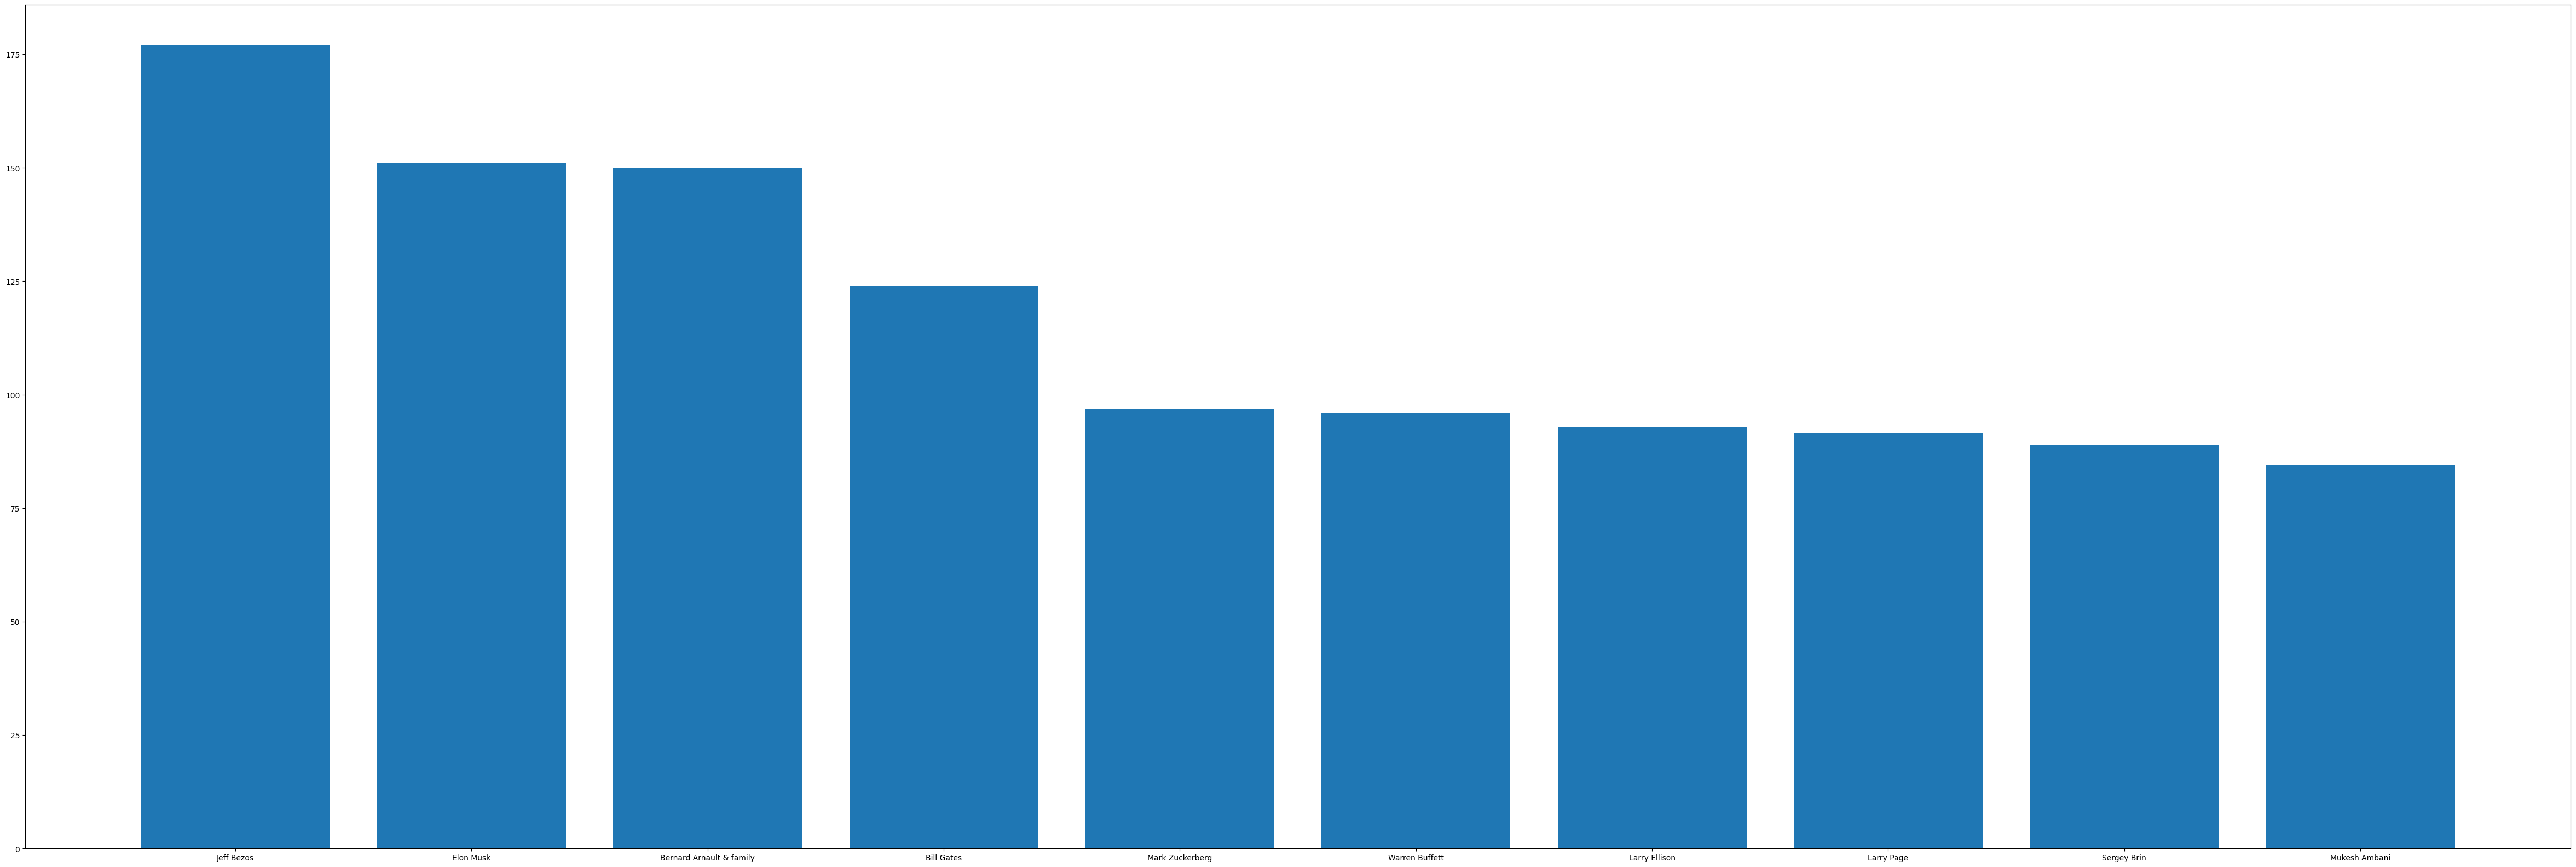

In [79]:
plt.figure(figsize=(60,20))
plt.bar(df["Name"],df["NetWorth"])

plt.show()

In [9]:
df=data["Source"].value_counts().rename_axis("Source").to_frame("count").head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


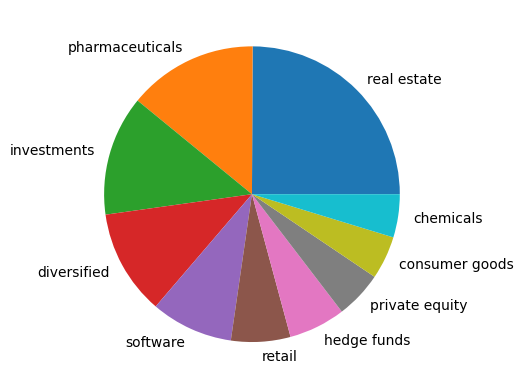

In [10]:
plt.pie(df["count"], labels=df["Source"])
plt.show()

In [11]:

df=data["Industry"].value_counts().rename_axis("Industry").to_frame("count").head(10).reset_index()

df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


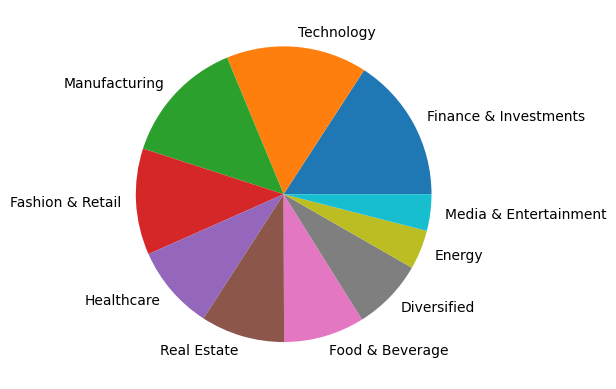

In [12]:
plt.pie(df["count"], labels=df["Industry"])
plt.show()

In [13]:
df=data["Country"].value_counts().rename_axis("Country").to_frame("count").head(10).reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68
6,Brazil,61
7,Canada,60
8,United Kingdom,54
9,Italy,49


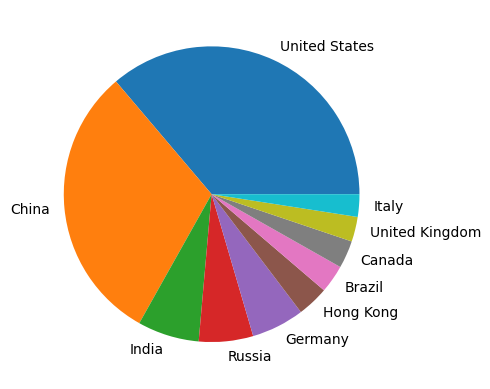

In [14]:
plt.pie(df["count"], labels=df["Country"])
plt.show()

In [15]:
df=data["Age"].mean()
df

63.1136023916293

In [80]:
df=data['Age'].var()
df

180.7721364011008

In [83]:
df = data.groupby('Country')['NetWorth'].sum().reset_index()
df=df.sort_values(by=["NetWorth"],ascending=False)
df.head(10)


,Country,NetWorth
66,United States,4384.7
8,China,2496.1
50,Russia,586.0
18,Germany,576.6
24,India,567.3
16,France,507.6
21,Hong Kong,428.4
29,Japan,222.2
6,Canada,217.5
5,Brazil,200.7


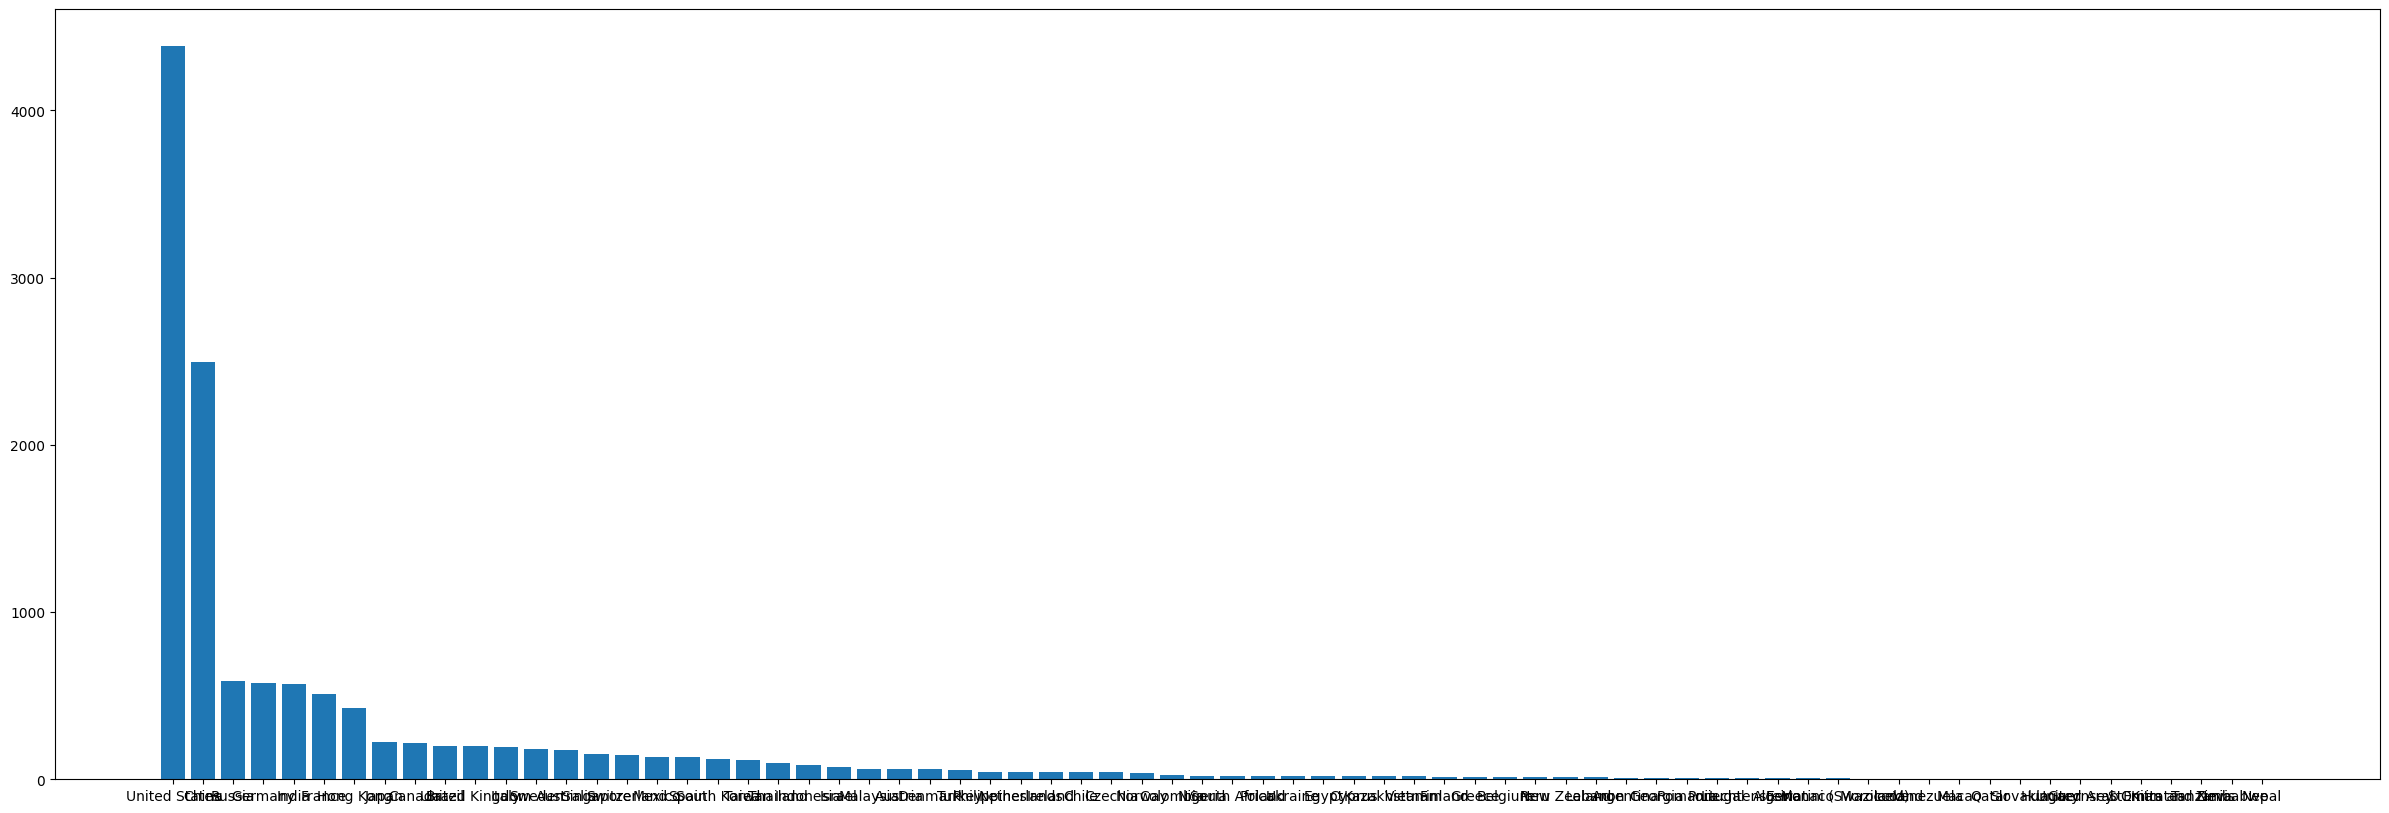

In [84]:
plt.figure(figsize=(30,10))
plt.bar(df["Country"],df["NetWorth"])
plt.show()

In [38]:
df=data.query('Country=="United States" ').reset_index()
df=df.sort_values(by=["NetWorth"],ascending=False).head(10).reset_index()
df


,level_0,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,5,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,6,7,Larry Page,91.5,United States,Google,8,48.0,Technology
7,7,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,8,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,9,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


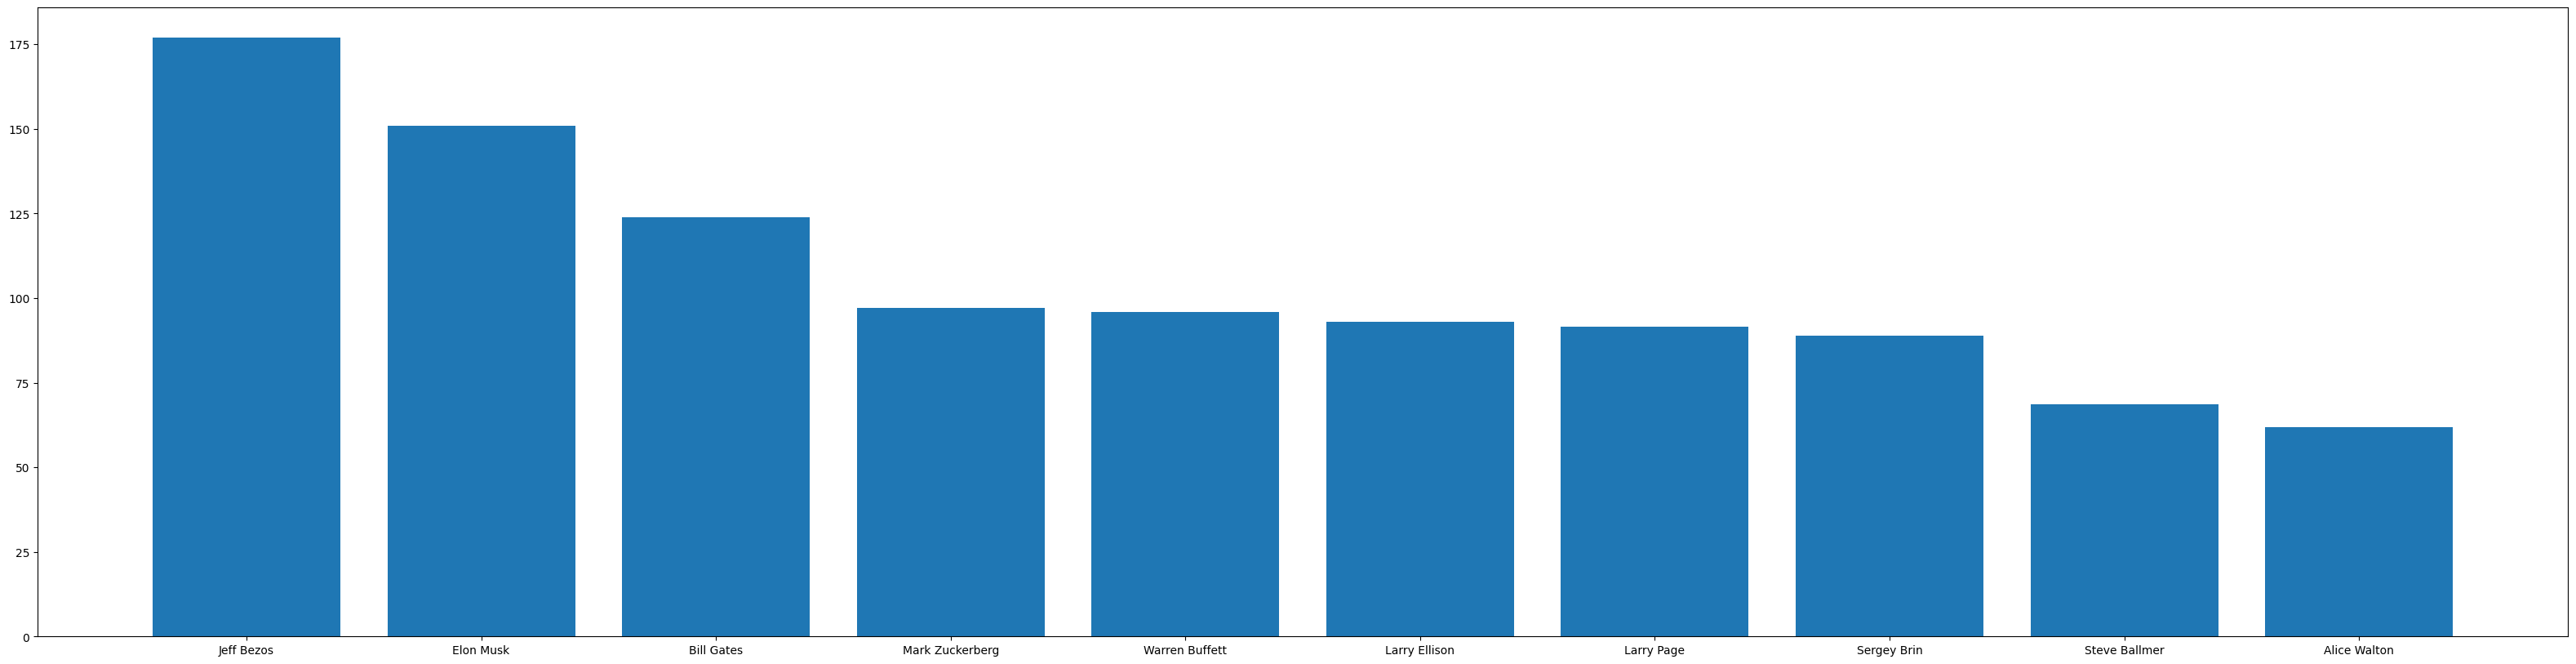

In [42]:
plt.figure(figsize=(40,10))
plt.bar(df["Name"],df["NetWorth"])

plt.show()

In [75]:

df=data["Country"].value_counts().rename_axis("Country").to_frame("count").reset_index()
df=df.query("count<2")
df=df.sort_values(by="count",ascending=True)
df.head(10)

,Country,count
58,Zimbabwe,1
59,St. Kitts and Nevis,1
60,Tanzania,1
61,Guernsey,1
62,Oman,1
63,United Arab Emirates,1
64,Macao,1
65,Venezuela,1
66,Eswatini (Swaziland),1
67,Algeria,1


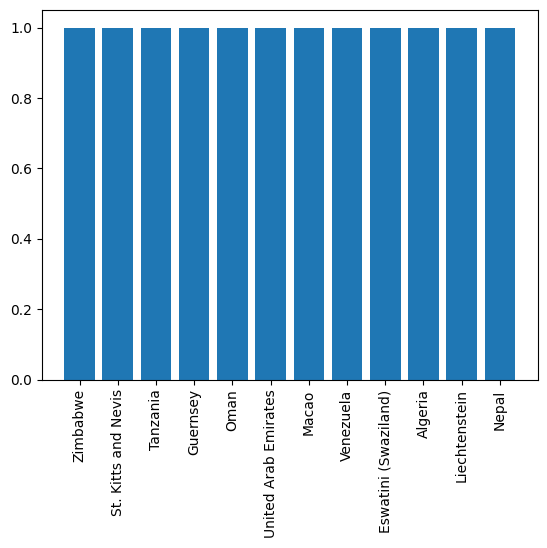

In [76]:
plt.bar(df["Country"],df["count"])
plt.xticks(rotation=90)

plt.show()